# Lab 4: Bivariate Statistics and Regression  

In this lab, you will be using glacier mass-balance data collected by the SFU Glaciology Group. 
You will use these data to explore linear and non-linear relationships between dependent and independent variables.

__Background__:  

Ablation is any form of glacier mass loss, expressed in units of equivalent water depth. 
Ablation can be estimated locally by repeated measurements of stake height over time (stakes get taller as they melt out), combined with a known measured density of the material (e.g. snow, ice) being lost. 
This allows a calculation of mass loss expressed as the equivalent depth of water.

Run the script 1 `load_data.py`. The output shows:  
  - Left Subplot: An array of stake locations from 2009 and 2012 within the glacier outline overlain on a map of surface elevations (colour, m above sea level). The x-y coordinates are UTM Easting (m) and UTM Northing (m).   
  - Right Subplot: Ablation rate (cm of water-equivalent loss per day) measured in 2009 and 2012 at the stake locations plotted as a function of elevation.  

As you can see in right subplot, ablation appears to be a function of elevation. But what is the dependence? To answer this question, complete the following questions.

<IPython.core.display.Javascript object>


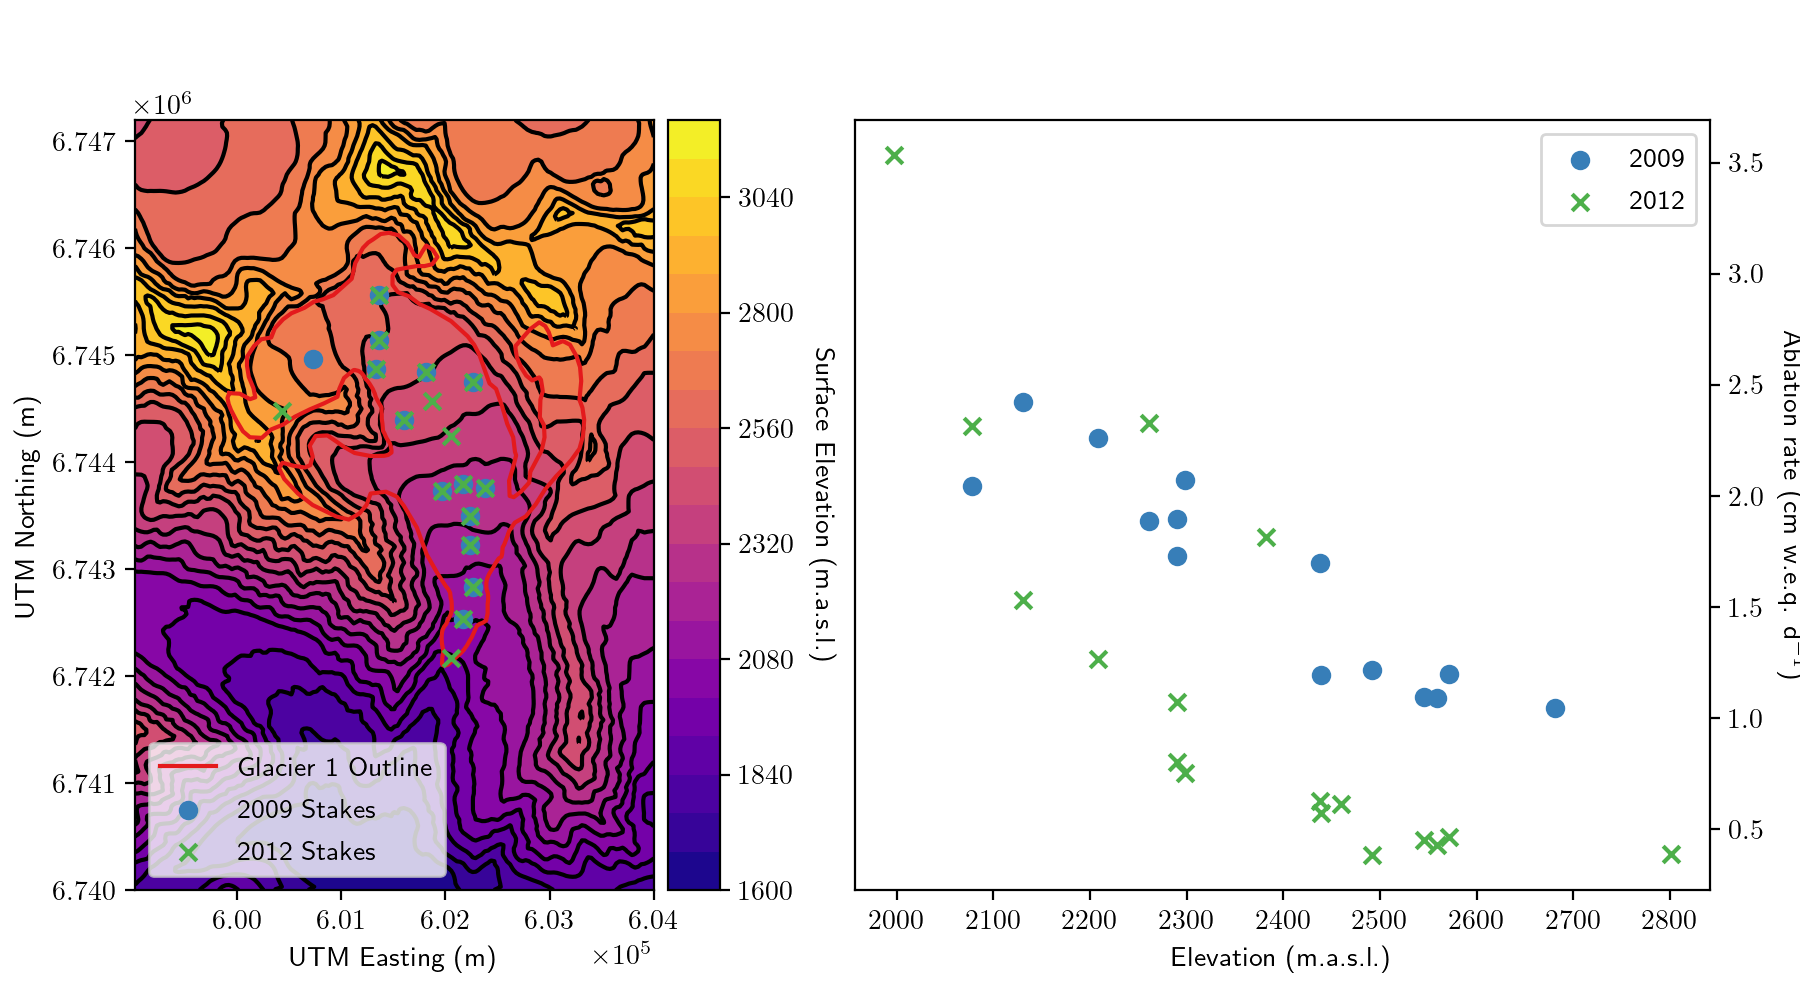

In [5]:
%matplotlib notebook
%run load_data.py
plt.show()

In [ ]:
import numpy as np
import pandas as pd 
import scipy.linalg as LA

ablation_2009 = pd.read_csv('GL1_stake_ablation_2009.csv',index_col=0)
ablation_2012 = pd.read_csv('GL1_stake_ablation_2012.csv',index_col=0)

In [ ]:
ablation_2009.head()

---   

### Exercise 1: (9 pts)

1. Why are bivariate statistics useful in Earth Science?  
2. What is covariance and Pearson’s correlation coefficient?  
3. Calculate Pearson’s correlation coefficient between ablation rate and elevation for each of the two data sets individually (2009 ablation rate vs. elevation, 2012 ablation rate vs. elevation). Do these two values suggest a relationship between ablation rate and elevation? If so, is the relationship linear?

---   

---
1. Why are bivariate statistics useful in Earth Science?  
---

---
2. What is covariance and Pearson’s correlation coefficient?  
---

---
3. Calculate Pearson’s correlation coefficient between ablation rate and elevation for each of the two data sets individually (2009 ablation rate vs. elevation, 2012 ablation rate vs. elevation). Do these two values suggest a relationship between ablation rate and elevation? If so, is the relationship linear?
---

In [ ]:
def PCC(x,y):
    """Calculate Pearson's Correlation Coefficient"""
    return np.sum((x - np.mean(x)) * (y - np.mean(y)))/((len(x)-1)*np.std(x)*np.std(y))

r_09 = PCC(ablation_2009['Elevation'], ablation_2009['ablation_rate'])
r_12 = PCC(ablation_2012['Elevation'], ablation_2012['ablation_rate'])

print('PCC for ablation vs. elevation in 2009: {:+.3f}'.format(r_09))
print('PCC for ablation vs. elevation in 2012: {:+.3f}'.format(r_12))

---   

### Exercise 2: (7 pts)

1. Write a function to calculate the slope and intercept of a classical least-squares regression line with generic input data vectors `x` and `y`. You can use the functions `np.sum()`, `len()`, `np.mean()`, and `LA.inv()`. The slope and y-intercept should be the function outputs.  

2. Calculate the slopes and intercepts of the two data sets (2009 ablation rate vs. elevation, 2012 ablation rate vs. elevation) using your function. Print your answer to the console. Use this information to plot a regression line on the same plot as your data.   

---

In [ ]:
def lstq(x,y):
    m = np.sum((x - np.mean(x))*(y - np.mean(y))) / np.sum((x - np.mean(x))**2)
    b = np.mean(y) - m * np.mean(x)
    return m,b 

m1, b1 = lstq(ablation_2009['Elevation'], ablation_2009['ablation_rate'])
m2, b2 = lstq(ablation_2012['Elevation'], ablation_2012['ablation_rate'])

yy1 = m1 * ablation_2009['Elevation'] + b1 
yy2 = m2 * ablation_2012['Elevation'] + b2

In [ ]:
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots(1,1)

ax.scatter(ablation_2009['Elevation'], ablation_2009['ablation_rate'])
ax.plot(ablation_2009['Elevation'], yy1, label='$\hat y$ = {:.3f}x+{:.3f}'.format(m1,b1))

ax.scatter(ablation_2012['Elevation'], ablation_2012['ablation_rate'])
ax.plot(ablation_2012['Elevation'], yy2, label='$\hat y$ = {:.3f}x+{:.3f}'.format(m2,b2))

ax.set_ylabel('Ablation rate (cm w.e.q. d$^{-1}$)')
ax.set_xlabel('Elevation (m.a.s.l.)')

ax.legend()

---  

### Exercise 3 (5 pts):

1. Calculate the correlation coefficient between the observed and estimated values of ablation rate using the ratio of the sum of squares of the regression ($SSR$) and the total sun of the squares ($SST$).  _Hint_ : write a function for each. 

2. What do the correlation coefficients mean? Would the values of the ablation rate estimated by the regression in one year be appropriate estimates of ablation rate in the other year?  

---

---
1. Calculate the correlation coefficient between the observed and estimated values of ablation rate using the ratio of the sum of squares of the regression ($SSR$) and the total sun of the squares ($SST$).  
---

In [ ]:
SST       = lambda y    : np.sum((y  - np.mean(y))**2)
SSR       = lambda y, yy: np.sum((yy - np.mean(y))**2)
SSE       = lambda y, yy: np.sum((yy - y)**2)
R_squared = lambda y, yy: SSR(y, yy) / SST(y)

R2_09 = R_squared(ablation_2009['ablation_rate'],yy1)
R2_12 = R_squared(ablation_2012['ablation_rate'],yy2)

print('R^2 for 2009: {:+.3f}'.format(R2_09))
print('R^2 for 2012: {:+.3f}'.format(R2_12))

---
2. What do the correlation coefficients mean? Would the values of the ablation rate estimated by the regression in one year be appropriate estimates of ablation rate in the other year?
---

---
### Exercise 4: (5 pts)

1. Plot a histogram of the residuals of the regression for each dataset. You may you `plt.hist()` if you would like.  

2. How would you determine if the residuals are normally distributed?  

3. What can you say about the data and the regression if the residuals have a Gaussian distribution?  

---

---
1. Plot a histogram of the residuals of the regression for each dataset. You may you `plt.hist()` if you would like.  
---

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True)

_ = ax1.hist(ablation_2009['ablation_rate'] - yy1, bins= 10, edgecolor='k')
_ = ax2.hist(ablation_2012['ablation_rate'] - yy2, bins= 10, edgecolor='k')

---
2. How would you determine if the residuals are normally distributed?  
---

---
3. What can you say about the data and the regression if the residuals have a Gaussian distribution?  
---

---
### Exercise 5: (5 pts)  


1. What can an _ANOVA_ tell you?  
2. Evaluate the significance of fit of the regressions to the data using an _ANOVA_.  
3. What is your interpretation of the _ANOVA_ results?  
---

---
1. What can an _ANOVA_ tell you?  
---

---
2. Evaluate the significance of fit of the regressions to the data using an _ANOVA_.  
---

In [ ]:
MSR_09 = SSR(ablation_2009['ablation_rate'], yy1)
MSR_12 = SSR(ablation_2012['ablation_rate'], yy2)

MSE_09 = SSE(ablation_2009['ablation_rate'], yy1) / (len(yy1) - 2)
MSE_12 = SSE(ablation_2012['ablation_rate'], yy2) / (len(yy2) - 2)

F_09   = MSR_09/MSE_09
print(MSR_09/MSE_09)

---
3. What is your interpretation of the _ANOVA_ results?  
---

---
### Exercise 6: (10 pts)  

1. What does the reduced major axis linear regression do?  
2. Write a second function to compute the reduced major axis linear regression.  
3. Plot these regression lines with the data and with the classical linear regression lines.  
4. How do these regressions compare to the classical regressions?  
5. How would you decide to which regression type is the most appropriate for a particular problem?  
---

---
1. What does the reduced major axis linear regression do?  
---

---
2. Write a second function to compute the reduced major axis linear regression.  
---

In [ ]:
def reduced_lstq(x,y):
    m = np.std(y) / np.std(x)
    if np.corrcoef(x,y)[0,1] < 0:
        m *= -1.0
    b = np.mean(y) - m * np.mean(x)
    return m, b 

---
3. Plot these regression lines with the data and with the classical linear regression lines.  
---

In [ ]:
m1_r, b1_r = reduced_lstq(ablation_2009['Elevation'], ablation_2009['ablation_rate'])
m2_r, b2_r = reduced_lstq(ablation_2012['Elevation'], ablation_2012['ablation_rate'])

yy1_r = m1_r * ablation_2009['Elevation'] + b1_r 
yy2_r = m2_r * ablation_2012['Elevation'] + b2_r

fig, ax = plt.subplots(1,1)

ax.scatter(ablation_2009['Elevation'], ablation_2009['ablation_rate'])
ax.plot(ablation_2009['Elevation'], yy1, label=r'$\hat y  $  = {:.3f}x+{:.3f}'.format(m1,b1))
ax.plot(ablation_2009['Elevation'], yy1_r, label='$\hat y_{{R}}$ = {:.3f}x+{:.3f}'.format(m1_r,b1_r))

ax.scatter(ablation_2012['Elevation'], ablation_2012['ablation_rate'])
ax.plot(ablation_2012['Elevation'], yy2, label='$\hat y  $   = {:.3f}x+{:.3f}'.format(m2,b2))
ax.plot(ablation_2012['Elevation'], yy2_r, label='$\hat y_{{R}}$ = {:.3f}x+{:.3f}'.format(m2_r,b2_r))

ax.set_ylabel('Ablation rate (cm w.e.q. d$^{-1}$)')
ax.set_xlabel('Elevation (m.a.s.l.)')

ax.legend(loc=1)

---
4. How do these regressions compare to the classical regressions?  
---

---
5. How would you decide to which regression type is the most appropriate for a particular problem?  
---

---
### Exercise 7: (8 pts)  

1. Use the `np.polyfit()` function to fit a quadratic to each of the two datasets. Plot these functions with the data.  
  - _Hint_ : You'll also need to use the `np.polyval()` function to quickly evaluate the polynomial coefficients  
  
2. Describe how you would determine whether the linear fit or the quadratic fit was most appropriate.
---

---
1. Use the `np.polyfit()` function to fit a quadratic to each of the two datasets. Plot these functions with the data.  
  - _Hint_ : You'll also need to use the `np.polyval()` function to quickly evaluate the polynomial coefficients  
---

In [ ]:
quad_09  = np.polyfit( ablation_2009['Elevation'], ablation_2009['ablation_rate'], 2)
xx_09    = np.linspace(ablation_2009['Elevation'].min(),ablation_2009['Elevation'].max())
yy1_quad = np.polyval( quad_09, xx_09)

quad_12  = np.polyfit( ablation_2012['Elevation'], ablation_2012['ablation_rate'], 2)
xx_12    = np.linspace(ablation_2012['Elevation'].min(),ablation_2012['Elevation'].max())
yy2_quad = np.polyval( quad_12, xx_12)

In [ ]:
fig, ax = plt.subplots(1,1)

ax.scatter(ablation_2009['Elevation'], ablation_2009['ablation_rate'])
ax.plot(xx_09, yy1_quad, label='$\hat y$ = {:5.2e}$x^2$ {:+.4f}$x + ${:.3f}'.format(*quad_09))

ax.scatter(ablation_2012['Elevation'], ablation_2012['ablation_rate'])
ax.plot(xx_12, yy2_quad, label='$\hat y$ = {:5.2e}$x^2$ {:+.4f}$x + ${:.3f}'.format(*quad_12))

ax.set_ylabel('Ablation rate (cm w.e.q. d$^{-1}$)')
ax.set_xlabel('Elevation (m.a.s.l.)')

ax.legend()

---
2. Describe how you would determine whether the linear fit or the quadratic fit was most appropriate.
---